In [64]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [65]:
df_test = pd.read_excel('dataset/TEST_content.xlsx')

c:\Users\nuvolaofficial\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\nuvolaofficial\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [66]:
df_test.head()

,minat,jurusan
0,Administrasi Bisnis memiliki dikantor menyukai...,Administrasi Bisnis
1,Administrasi Bisnis menyukai memiliki kemampua...,Administrasi Bisnis
2,Administrasi Bisnis menyukai memiliki kemampua...,Administrasi Bisnis
3,Administrasi Publik cenderung tertarik mempela...,Administrasi Publik
4,Administrasi Publik cenderung tertarik mempela...,Administrasi Publik


In [67]:
df_test

,minat,jurusan
0,Administrasi Bisnis memiliki dikantor menyukai...,Administrasi Bisnis
1,Administrasi Bisnis menyukai memiliki kemampua...,Administrasi Bisnis
2,Administrasi Bisnis menyukai memiliki kemampua...,Administrasi Bisnis
3,Administrasi Publik cenderung tertarik mempela...,Administrasi Publik
4,Administrasi Publik cenderung tertarik mempela...,Administrasi Publik
...,...,...
183,Akuakultur menyukai kegiatan outdoor science c...,Akuakultur
184,Administrasi Bisnis menyukai memiliki kemampua...,Akuakultur
185,Administrasi Bisnis menyukai memiliki kemampua...,Administrasi Bisnis
186,Administrasi Bisnis memiliki dikantor menyukai...,Administrasi Bisnis


In [82]:
# df_train.isna().sum()
df_test.isna().sum()

minat      0
jurusan    0
dtype: int64

In [83]:
df_test = df_test.fillna('ffill')

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df_test['minat'], df_test['jurusan'], test_size=0.2, random_state=42)

In [85]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [86]:
model = MultinomialNB()

In [87]:
model.fit(X_train, y_train)

MultinomialNB()

In [88]:
y_pred = model.predict(X_test)

In [89]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
print('F1 score: ', f1_score(y_test, y_pred, average='weighted'))

Accuracy:  0.7105263157894737
Precision:  0.644110275689223
Recall:  0.7105263157894737
F1 score:  0.6565452091767882


c:\Users\nuvolaofficial\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

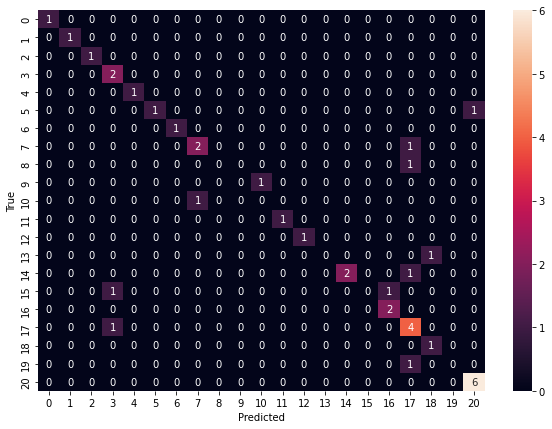

In [92]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [93]:
cm

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,